## Lab: Advanced Visualization with Matplotlib and Seaborn

## Introduction  
Welcome to the lab session for **Advanced Visualization with Matplotlib and Seaborn**. In this session, you will learn how to leverage the advanced features of both libraries to create more sophisticated and insightful visualizations.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Data Preprocessing

#### **Data Cleaning**

In [48]:
# Sample dataset
data = {
    'Name': ['John', 'Jane', 'John', 'Mike', 'Sarah'],
    'Age': [25, 30, 25, np.nan, 35],
    'Height_inches': [70, 65, 70, 72, 68],
    'Weight_lbs': [180, 140, 180, 200, 150]
}
df = pd.DataFrame(data)
df

,Name,Age,Height_inches,Weight_lbs
0,John,25.0,70,180
1,Jane,30.0,65,140
2,John,25.0,70,180
3,Mike,NaN,72,200
4,Sarah,35.0,68,150


**1. Remove duplicates**

In [49]:
df = df.drop_duplicates()
df

,Name,Age,Height_inches,Weight_lbs
0,John,25.0,70,180
1,Jane,30.0,65,140
3,Mike,NaN,72,200
4,Sarah,35.0,68,150


**2. Remove irrelevant data (assuming 'Name' is not needed for analysis)**  
`axis=0` refers to row  
`axis=1` refers to columns  

In [50]:
df = df.drop('Name', axis=1)
df

,Age,Height_inches,Weight_lbs
0,25.0,70,180
1,30.0,65,140
3,NaN,72,200
4,35.0,68,150


**3. Fix structural errors (standardize units)**

In [52]:
df['Height_cm'] = df['Height_inches'] * 2.54
df['Weight_kg'] = df['Weight_lbs'] * 0.453592

df

,Age,Height_inches,Weight_lbs,Height_cm,Weight_kg
0,25.0,70,180,177.80,81.64656
1,30.0,65,140,165.10,63.50288
3,30.0,72,200,182.88,90.71840
4,35.0,68,150,172.72,68.03880


**4. Handling missing values (simple imputation with mean)**

In [53]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df

,Age,Height_inches,Weight_lbs,Height_cm,Weight_kg
0,25.0,70,180,177.80,81.64656
1,30.0,65,140,165.10,63.50288
3,30.0,72,200,182.88,90.71840
4,35.0,68,150,172.72,68.03880


---

### Data Transformation

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Sample data
df = pd.DataFrame({
    'Value': [1, 10, 15, 25, 50, 75, 100],
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A']
})

In [55]:
df

,Value,Category
0,1,A
1,10,B
2,15,A
3,25,C
4,50,B
5,75,C
6,100,A


In [56]:
# 1. Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df['Normalized'] = scaler.fit_transform(df[['Value']])

# 2. Standardization (mean 0, standard deviation 1)
scaler = StandardScaler()
df['Standardized'] = scaler.fit_transform(df[['Value']])

# 3. Log transformation (add 1 to avoid log(0))
df['Log_transformed'] = np.log(df['Value'] + 1)

# 4. One-Hot Encoding of categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Category']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Category']))
df = pd.concat([df, encoded_df], axis=1)

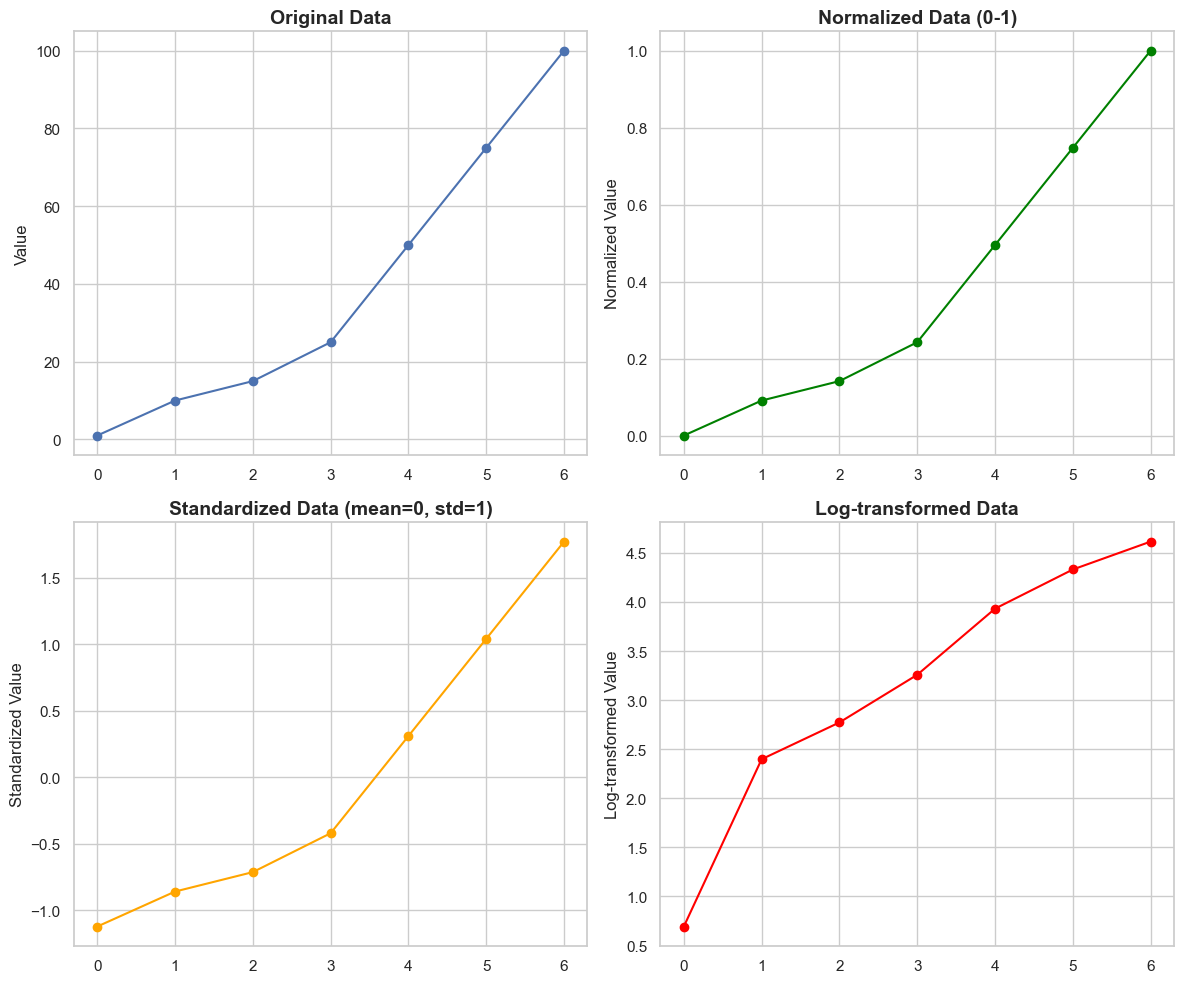

One-Hot Encoded Categories:
    Category_A  Category_B  Category_C
0         1.0         0.0         0.0
1         0.0         1.0         0.0
2         1.0         0.0         0.0
3         0.0         0.0         1.0
4         0.0         1.0         0.0
5         0.0         0.0         1.0
6         1.0         0.0         0.0

Transformed DataFrame:
    Value  Normalized  Standardized  Log_transformed
0      1    0.000000     -1.123215         0.693147
1     10    0.090909     -0.860157         2.397895
2     15    0.141414     -0.714014         2.772589
3     25    0.242424     -0.421728         3.258097
4     50    0.494949      0.308988         3.931826
5     75    0.747475      1.039704         4.330733
6    100    1.000000      1.770420         4.615121


In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot original data
ax1.plot(df['Value'], 'o-', label='Original')
ax1.set_title('Original Data', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value')
ax1.grid(True)

# Plot normalized data
ax2.plot(df['Normalized'], 'o-', color='green', label='Normalized')
ax2.set_title('Normalized Data (0-1)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Normalized Value')
ax2.grid(True)

# Plot standardized data
ax3.plot(df['Standardized'], 'o-', color='orange', label='Standardized')
ax3.set_title('Standardized Data (mean=0, std=1)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Standardized Value')
ax3.grid(True)

# Plot log-transformed data
ax4.plot(df['Log_transformed'], 'o-', color='red', label='Log-transformed')
ax4.set_title('Log-transformed Data', fontsize=14, fontweight='bold')
ax4.set_ylabel('Log-transformed Value')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Show encoded categorical data
print("One-Hot Encoded Categories:\n", df[['Category_A', 'Category_B', 'Category_C']])

# Display the DataFrame with transformations
print("\nTransformed DataFrame:\n", df[['Value', 'Normalized', 'Standardized', 'Log_transformed']])

---

### Advanced Plotting Techniques

**1. Subplots**

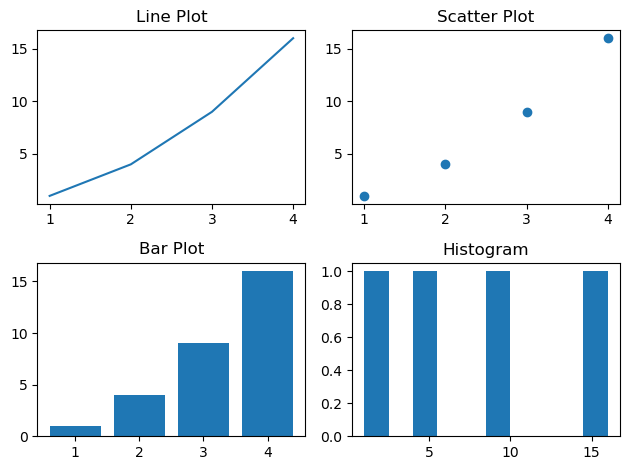

In [24]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y), axs[0, 0].set_title('Line Plot')
axs[0, 1].scatter(x, y), axs[0, 1].set_title('Scatter Plot')
axs[1, 0].bar(x, y), axs[1, 0].set_title('Bar Plot')
axs[1, 1].hist(y), axs[1, 1].set_title('Histogram')
plt.tight_layout()
plt.show()

**2. Heatmaps**

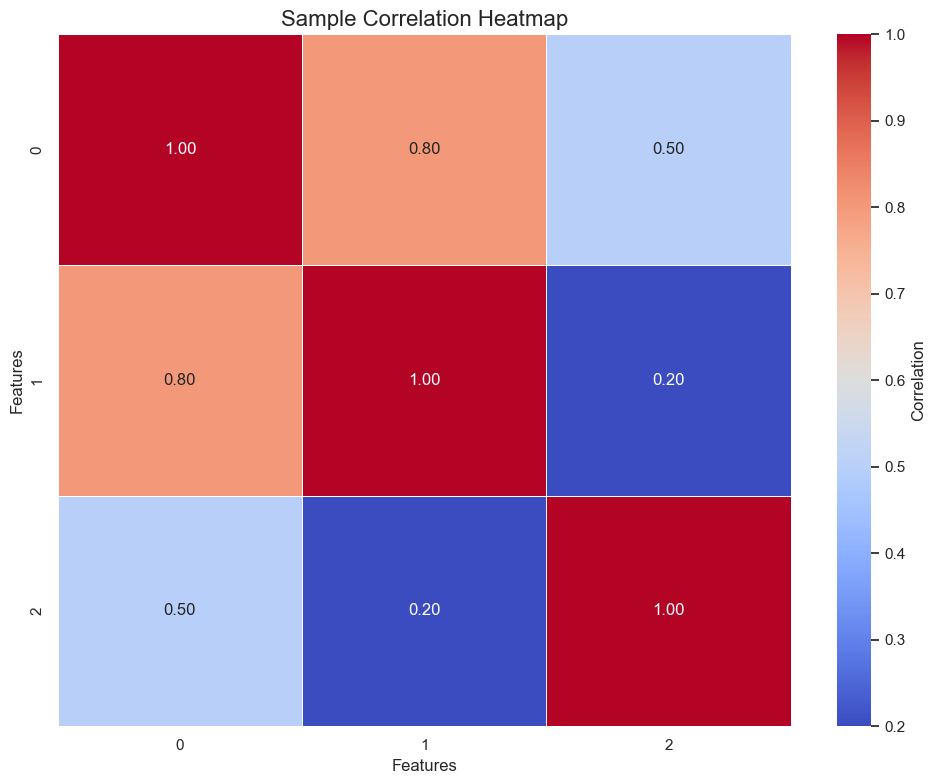

In [58]:
# Create sample data
data = np.array([[1, 0.8, 0.5], 
                 [0.8, 1, 0.2], 
                 [0.5, 0.2, 1]])

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt='.2f',
            cbar_kws={'label': 'Correlation'})

plt.title('Sample Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

**3D plots**  
* 3D Surface Plot (Mathematical Function)  
<p>We will visualize the function z = x<sup>2</sup> + y<sup>2</sup> using a 3D surface plot.</p>

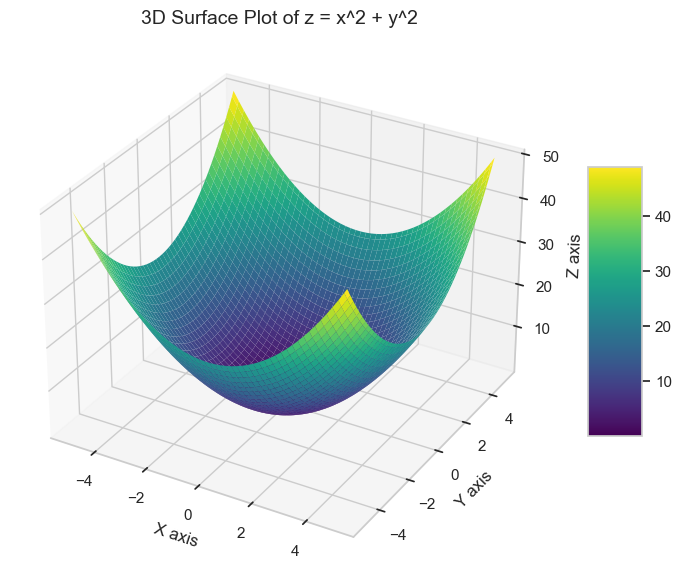

In [60]:
# Create a grid of x, y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# mathematical function z = f(x, y)
z = x**2 + y**2

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot of z = x^2 + y^2', fontsize=14)

# Add a color bar to show the range of values
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

**4. Network Graphs**

Create a graph for computer network topology

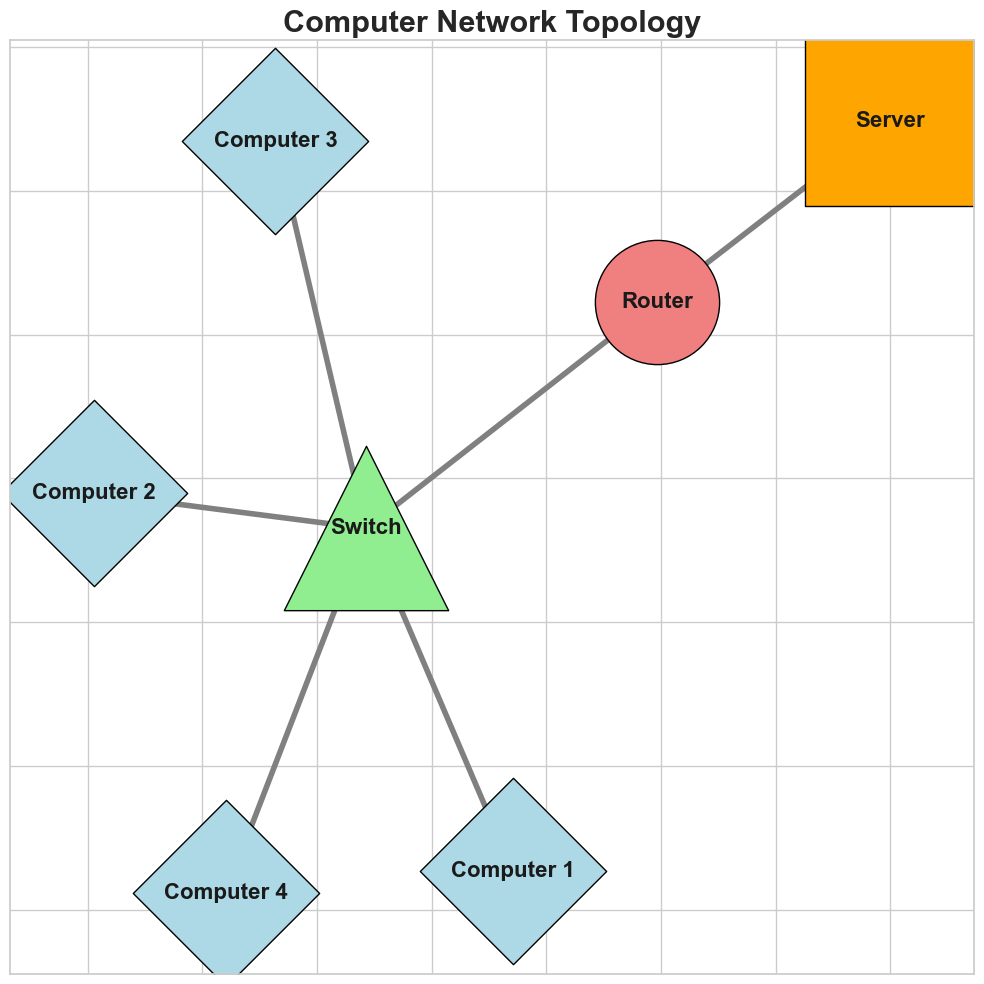

In [72]:
import networkx as nx

G_network = nx.Graph()

# Add nodes (computers, routers, switches, servers)
devices = ["Router", "Computer 1", "Computer 2", "Computer 3", "Computer 4", "Switch", "Server"]
G_network.add_nodes_from(devices)

# Add edges (network connections)
network_edges = [("Router", "Switch"), ("Switch", "Computer 1"), ("Switch", "Computer 2"),
                 ("Switch", "Computer 3"), ("Switch", "Computer 4"), ("Router", "Server")]
G_network.add_edges_from(network_edges)

# Use Seaborn color palette for edges and nodes
palette = sns.color_palette("coolwarm", as_cmap=True)
node_colors = sns.color_palette("light:#5A9_r", n_colors=len(devices))  # light blue palette

# Define positions for nodes using a force-directed layout
pos = nx.spring_layout(G_network, seed=42)

# Split device types into different categories for shape differentiation
computers = ["Computer 1", "Computer 2", "Computer 3", "Computer 4"]
router = ["Router"]
switch = ["Switch"]
server = ["Server"]

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")

# Draw each type of node with different shapes and colors
nx.draw_networkx_nodes(G_network, pos, nodelist=computers, node_size=9000, node_shape='D',
                       node_color='lightblue', edgecolors='black', label="Computers")  # Diamomd for computers

nx.draw_networkx_nodes(G_network, pos, nodelist=router, node_size=8000, node_shape='o',
                       node_color='lightcoral', edgecolors='black', label="Router")  # Circle for router

nx.draw_networkx_nodes(G_network, pos, nodelist=switch, node_size=14000, node_shape='^',
                       node_color='lightgreen', edgecolors='black', label="Switch")  # Triangle for switch

nx.draw_networkx_nodes(G_network, pos, nodelist=server, node_size=15000, node_shape='s',
                       node_color='orange', edgecolors='black', label="Server")  # Square for server

# Draw edges with gradient color
nx.draw_networkx_edges(G_network, pos, edge_color='gray', width=4)

nx.draw_networkx_labels(G_network, pos, font_size=16, font_weight='bold')

plt.title('Computer Network Topology', fontsize=22, weight='bold')

# Add grid and adjust layout
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

---

### Colormaps and Colorbars in Matplotlib

C:\Users\PC\AppData\Local\Temp\ipykernel_20760\1172701380.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [get_cmap('inferno')(val) for val in scaled_data]
C:\Users\PC\AppData\Local\Temp\ipykernel_20760\1172701380.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='inferno'))


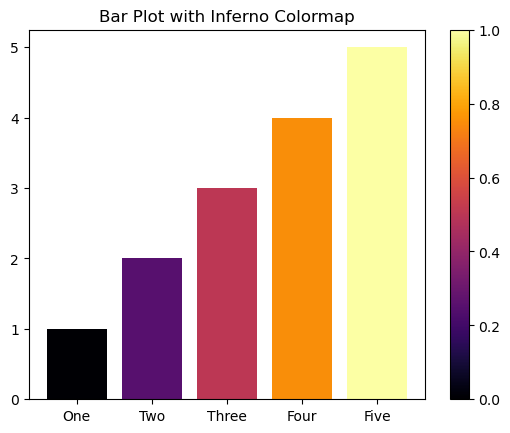

In [2]:
from matplotlib.cm import get_cmap

labels = ['One', 'Two', 'Three', 'Four', 'Five']
data = [1, 2, 3, 4, 5]

# Normalize data for colormap scaling
scaled_data = [(datum-min(data))/(max(data)-min(data)) for datum in data]

# Apply the 'inferno' colormap
colors = [get_cmap('inferno')(val) for val in scaled_data]

plt.bar(labels, data, color=colors)
plt.colorbar(plt.cm.ScalarMappable(cmap='inferno'))
plt.title('Bar Plot with Inferno Colormap')
plt.show()

---

### Customizing and Enhancing Visualizations

A simple **line plot (no customizations)** to show as a baseline.

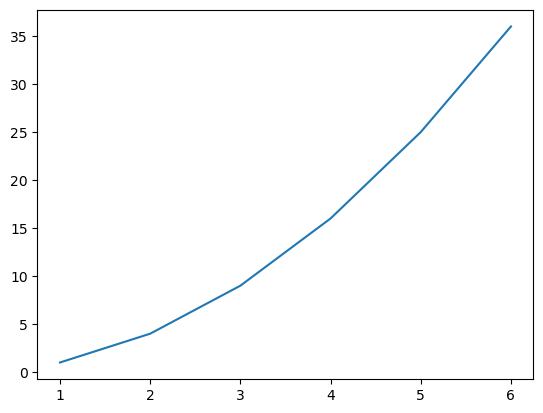

In [3]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

plt.plot(x, y)
plt.show()

**Simple line Plot with labels, title and legend**

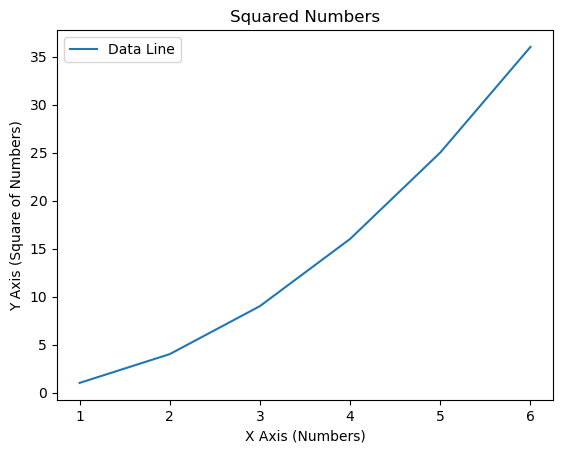

In [4]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

plt.plot(x, y, label='Data Line')

# Adding labels and title
plt.xlabel('X Axis (Numbers)')
plt.ylabel('Y Axis (Square of Numbers)')
plt.title('Squared Numbers')

# Adding legend
plt.legend(loc='upper left', fontsize=10)

plt.show()

**Plot with labels and title in custom font styles (bold, italic)**

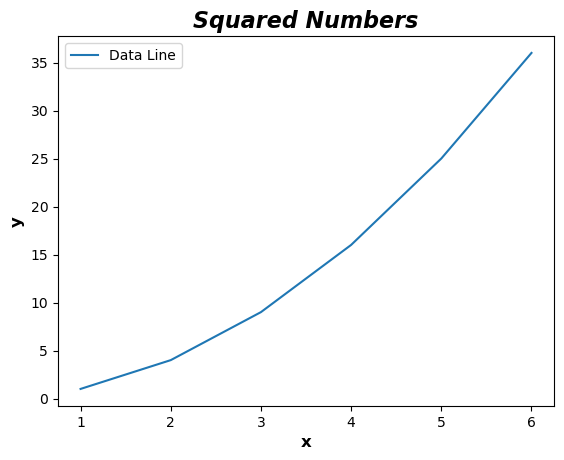

In [5]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

plt.plot(x, y, label='Data Line')

plt.xlabel('x', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('y', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Squared Numbers', fontdict={'fontsize': 16, 'fontstyle': 'italic', 'fontweight': 'bold'})

plt.legend()
plt.show()

**Customizing Legends**

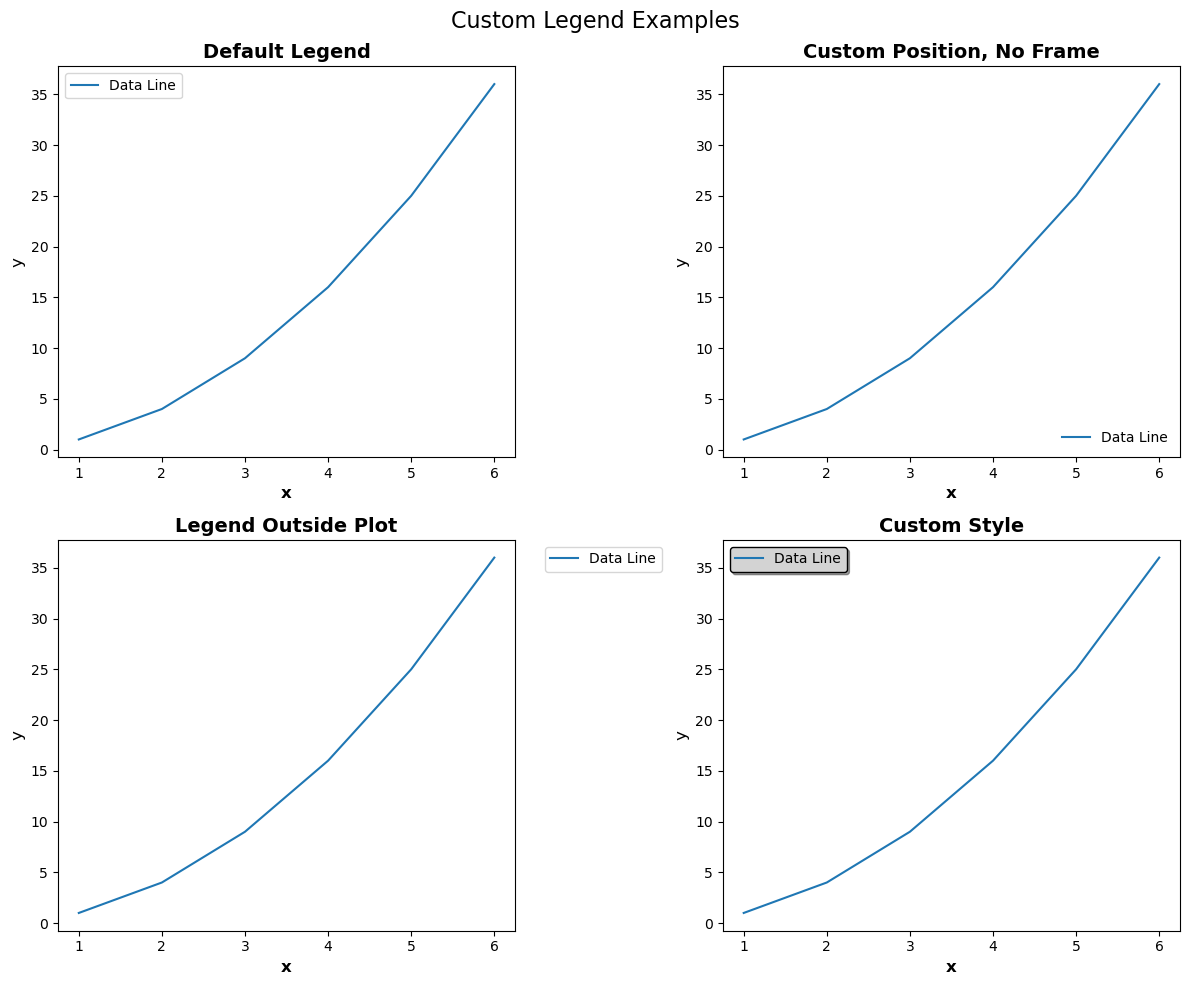

In [6]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

# Create a figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Custom Legend Examples', fontsize=16)

# Subplot 1: Default legend
ax1.plot(x, y, label='Data Line')
ax1.set_xlabel('x', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_ylabel('y', fontdict={'fontsize': 12})
ax1.set_title('Default Legend', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax1.legend()

# Subplot 2: Custom position and no frame
ax2.plot(x, y, label='Data Line')
ax2.set_xlabel('x', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_ylabel('y', fontdict={'fontsize': 12})
ax2.set_title('Custom Position, No Frame', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.legend(loc='lower right', frameon=False, fontsize=10)

# Subplot 3: Outside the plot
ax3.plot(x, y, label='Data Line')
ax3.set_xlabel('x', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax3.set_ylabel('y', fontdict={'fontsize': 12})
ax3.set_title('Legend Outside Plot', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 4: Custom style
ax4.plot(x, y, label='Data Line')
ax4.set_xlabel('x', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax4.set_ylabel('y', fontdict={'fontsize': 12})
ax4.set_title('Custom Style', fontdict={'fontsize': 14, 'fontweight': 'bold'})
legend = ax4.legend(loc='upper left', frameon=True, shadow=True, fancybox=True)
frame = legend.get_frame()
frame.set_facecolor('lightgray')
frame.set_edgecolor('black')

plt.tight_layout()
plt.show()

---

**2. Customizing tick marks**  
Using `plt.xticks()` and `plt.yticks()` to control tick mark intervals and labels.

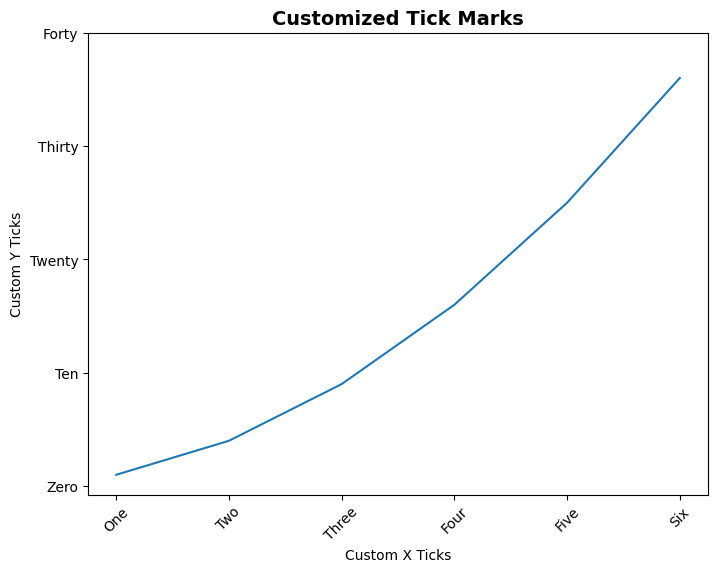

In [7]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

plt.figure(figsize=(8, 6))
plt.plot(x, y)

# Customizing tick marks for both axes
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['One', 'Two', 'Three', 'Four', 'Five', 'Six'], fontsize=10, rotation=45)
plt.yticks(ticks=[0, 10, 20, 30, 40], labels=['Zero', 'Ten', 'Twenty', 'Thirty', 'Forty'], fontsize=10)

plt.title('Customized Tick Marks', fontsize=14, fontweight='bold')
plt.xlabel('Custom X Ticks')
plt.ylabel('Custom Y Ticks')
plt.show()

<h3 align="center"><b>Islamia College Peshawar (Public Sector University)</b></h3>

### Job Placement Distribution by Batch

In [3]:
import plotly.graph_objects as go
import plotly.io as pio

**Batch 2017 - 2021**

In [5]:
data = {
    'Category': ['Software Houses/Developers', 'Government/IT Jobs', 'Higher Studies', 'Officers', 'Freelancers', 'Entrepreneurs', 'Others'],
    'Percentage': [30, 30, 10, 10, 10, 5, 5]
}
df = pd.DataFrame(data)

In [7]:
# Create a Seaborn color palette
colors = sns.color_palette("pastel", n_colors=len(df))

# Create an interactive Plotly pie chart
fig = go.Figure(data=[go.Pie(
    labels=df['Category'],
    values=df['Percentage'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors),
    hoverinfo='label+percent',
    textfont_size=14
)])

# Update layout for better appearance
fig.update_layout(
    title={
        'text': "Job Placement (2017 - 2021)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=30)
    },
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, b=100, l=0, r=0),
    height=700
)

# Add 3D effects
fig.update_traces(hole=.4, pull=[0.1, 0, 0, 0, 0.1, 0.2, 0.2])

# Show the interactive chart
fig.show()

**Batch 2018 - 2022**

In [8]:
data = {
    'Category': ['Software Houses/Developers', 'Government/IT Jobs', 'Freelancers', 'Higher Studies', 'Officers', 'Entrepreneurs', 'Others'],
    'Percentage': [35, 25, 15, 10, 5, 5, 5]
}
df = pd.DataFrame(data)

In [10]:
# Create a Seaborn color palette
colors = sns.color_palette("pastel", n_colors=len(df))

# Create an interactive Plotly pie chart
fig = go.Figure(data=[go.Pie(
    labels=df['Category'],
    values=df['Percentage'],
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors),
    hoverinfo='label+percent',
    textfont_size=12
)])

# Update layout for better appearance
fig.update_layout(
    title={
        'text': "Job Placement (2018 - 2022)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=30)
    },
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, b=100, l=0, r=0),
    height=700
)

# Add 3D effects
fig.update_traces(hole=.4, pull=[0.1, 0, 0, 0, 0.1, 0.2, 0.2])

# Show the interactive chart
fig.show()

---

### **Combining Matplotlib and Seaborn**

### Case Study: Analyzing Flight Data  

* We will consider the `flights` dataset, which records the number of airline passengers who flew in each month from 1949 to 1960.  
* This dataset has three variables (year, month, and number of passengers)  

In this case study, we visualize monthly airline passengers over time, combining Seaborn’s statistical capabilities with Matplotlib’s fine-tuned control for creating a multi-layered visualization.  

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset - **Flight dataset** from seaborn

In [10]:
flights = sns.load_dataset('flights')

In [11]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


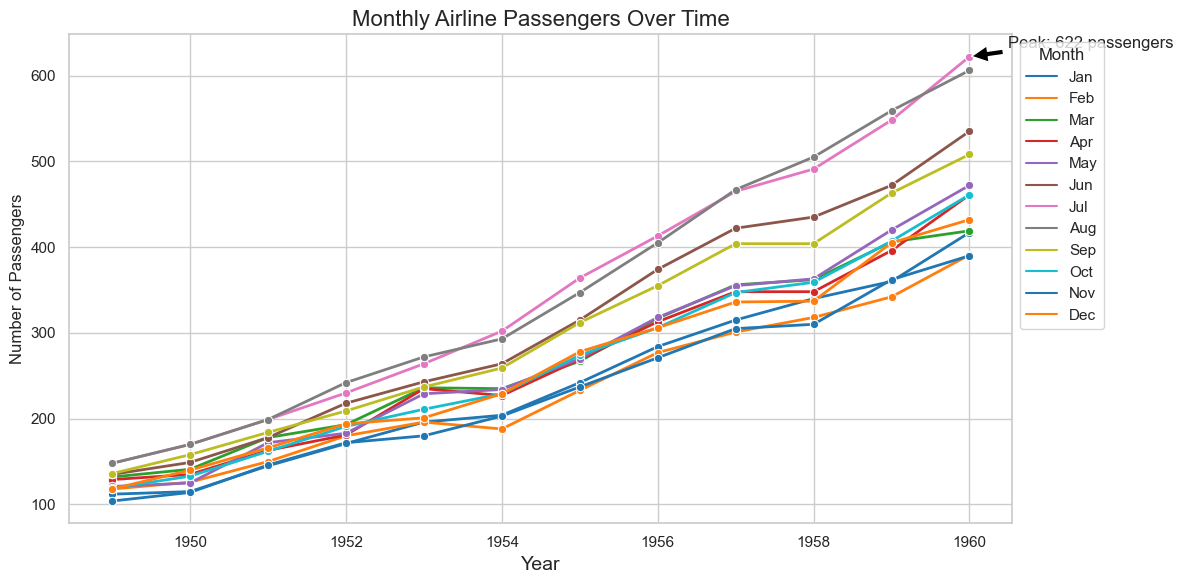

In [12]:
plt.figure(figsize=(12, 6))
# Plotting a line plot using seaborn for number of passengers over time
sns.set_theme(style="whitegrid")
sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="tab10", marker="o", lw=2)

# Customizing the plot with Matplotlib
plt.title('Monthly Airline Passengers Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=12)

# Highlighting specific points using annotations (Matplotlib feature)
max_passengers = flights[flights['passengers'] == flights['passengers'].max()]
for index, row in max_passengers.iterrows():
    plt.annotate(f"Peak: {int(row['passengers'])} passengers", xy=(row['year'], row['passengers']), 
                 xytext=(row['year'] + 0.5, row['passengers'] + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Adding a custom legend and final adjustments
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

---
Thank You
---